# Berechnung der Mond und Sonnenfinsternisse $\pm 300$ Jahre von heute, mit einer Genauigkeit von $\approx 1'$ der Positionen

## Quellen:
- https://ui.adsabs.harvard.edu/abs/1979ApJS...41..391V/abstract
- https://de.wikipedia.org/wiki/Sonnenstand#Astronomische_Zusammenh%C3%A4nge
- https://de.wikipedia.org/wiki/Sternzeit#Berechnung_der_Sternzeit

- https://gssc.esa.int/navipedia/index.php/Ellipsoidal_and_Cartesian_Coordinates_Conversion
- https://de.wikipedia.org/wiki/World_Geodetic_System_1984
  

Beispiel für die berechneten Mond und Sonnenfinsternisse
- Mondfinsternis am 4.4.2015 in Bangkok: https://youtu.be/FyfWpQCaTv4 , Vergleich: https://commons.wikimedia.org/wiki/File:Total_Lunar_Eclipse_(17015356766).jpg
- Mondfinsternis am 10.12.2011 in München https://www.youtube.com/watch?v=MiNesvhPyoA
- Sonnenfinsternis am 11.8.1999 in Ocnele Mari https://www.youtube.com/watch?v=0yFPWxuUaHY
- Mond am 1.6.2025 in München (keine Mond oder Sonnenfinsternis) https://www.youtube.com/watch?v=N4yEuD_EgTw

# Berechnung

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import rcParams
rcParams['font.family'] = 'monospace'

DEG2RAD = np.pi/180
RAD2DEG = 180/np.pi
AE = 149597870700 #1 Astronomische Einheit in m
RE = 6371000.8#Radius Erde
RM = 1736.0e3#Radius Mond
RS = 695700e3#Radius Sonne

def s2c(theta,lat,r):#kartesisches Koordinatensystem in spährisches Koordinatensystem
    return (r*np.cos(theta)*np.cos(lat),r*np.cos(theta)*np.sin(lat),r*np.sin(theta))

def ellipse2c(theta,lat,h):#ellipsoidische koordinaten in kartesische
    a = 6378137 
    f = 1 / 298.257223563 
    e2 = 2*f - f**2
    N = a/(1-e2*np.sin(lat)**2)**0.5
    return ((N+h)*np.cos(theta)*np.cos(lat),(N+h)*np.cos(theta)*np.sin(lat),((1-e2)*N+h)*np.sin(theta))
 
    
def c2s(x,y,z):#sphärisches Koordinatenystem in kartesisches Koordinatensystem
    return (np.arcsin(z/np.sqrt(x**2+y**2+z**2)),np.arctan2(y,x),np.sqrt(x**2+y**2+z**2))
    

def calc(Y,M,D,H,lat,lon):#berechnet Azimut/Atltitude von Mond,Sonne,Erdschatten auf Mond + Winkelausdehung am gewünschten Datum und Ort
    #julianisches datum
    JD = 367*Y-7*(Y+(M+9)//12)//4-3*((Y+(M-9)//7)//100+1)//4+275*M//9+D+1721029 + (H-12)/24
    t = JD - 2451545.0
    T = t/36525 + 1 
    
    #berechne Planeten/Mond Position
    P1 = (0.606434+0.03660110129*t)*2*np.pi
    P2 = (0.374987+0.03629164709*t)*2*np.pi
    P3 = (0.259091+0.03674819520*t)*2*np.pi
    P4 = (0.827362+0.03386319198*t)*2*np.pi
    P5 = (0.347343+-0.00014709391*t)*2*np.pi
    P7 = (0.779072+0.00273790931*t)*2*np.pi
    P8 = (0.993126+0.00273777850*t)*2*np.pi
    P9 = (0.700695+0.01136771400*t)*2*np.pi
    P10 = (0.485541+0.01136759566*t)*2*np.pi
    P11 = (0.566441+0.01136762384*t)*2*np.pi
    P12 = (0.505498+0.00445046867*t)*2*np.pi
    P13 = (0.130023+0.00445036173*t)*2*np.pi
    P14 = (0.292498+0.00445040017*t)*2*np.pi
    P15 = (0.987353+0.00145565328*t)*2*np.pi
    P16 = (0.053856+0.00145561327*t)*2*np.pi
    P17 = (0.849694+0.00145569465*t)*2*np.pi
    P18 = (0.089608+0.00023080893*t)*2*np.pi
    P19 = (0.056531+0.00023080893*t)*2*np.pi

    sunv = +0.39785*np.sin(+1.0*P7) \
           +-0.01*np.sin(+1.0*P7+-1.0*P8) \
           +0.00333*np.sin(+1.0*P7+1.0*P8) \
           +-0.00021*T**1.0*np.sin(+1.0*P7) \
           +0.00004*np.sin(+1.0*P7+2.0*P8) \
           +-0.00004*np.cos(+1.0*P7) \
           +-0.00004*np.sin(+1.0*P5+-1.0*P7) \
           +0.00003*T**1.0*np.sin(+1.0*P7+-1.0*P8) 


    sunu = +1*np.cos(0) \
           +-0.03349*np.cos(+1.0*P8) \
           +-0.00014*np.cos(+2.0*P8) \
           +0.00008*T**1.0*np.cos(+1.0*P8) \
           +-0.00003*np.sin(+1.0*P8+-1.0*P19) 

    sunw =  +-0.04129*np.sin(+2.0*P7) \
           +0.03211*np.sin(+1.0*P8) \
           +0.00104*np.sin(+2.0*P7+-1.0*P8) \
           +-0.00035*np.sin(+2.0*P7+1.0*P8) \
           +-0.0001*np.cos(0) \
           +-0.00008*T**1.0*np.sin(+1.0*P8) \
           +-0.00008*np.sin(+1.0*P5) \
           +0.00007*np.sin(+2.0*P8) \
           +0.00005*T**1.0*np.sin(+2.0*P7) \
           +0.00003*np.sin(+1.0*P1+-1.0*P7) \
           +-0.00002*np.cos(+1.0*P8+-1.0*P19) \
           +0.00002*np.sin(+4.0*P8+-8.0*P16+3.0*P19) \
           +-0.00002*np.sin(+1.0*P8+-1.0*P13) \
           +-0.00002*np.cos(+2.0*P8+-2.0*P13) 


    moonv = +0.39558*np.sin(+1.0*P3+1.0*P5) \
            +0.082*np.sin(+1.0*P3) \
            +0.03257*np.sin(+1.0*P2+-1.0*P3+-1.0*P5) \
            +0.01092*np.sin(+1.0*P2+1.0*P3+1.0*P5) \
            +0.00666*np.sin(+1.0*P2+-1.0*P3) \
            +-0.00644*np.sin(+1.0*P2+1.0*P3+-2.0*P4+1.0*P5) \
            +-0.00331*np.sin(+1.0*P3+-2.0*P4+1.0*P5) \
            +-0.00304*np.sin(+1.0*P3+-2.0*P4) \
            +-0.0024*np.sin(+1.0*P2+-1.0*P3+-2.0*P4+-1.0*P5) \
            +0.00226*np.sin(+1.0*P2+1.0*P3) \
            +-0.00108*np.sin(+1.0*P2+1.0*P3+-2.0*P4) \
            +-0.00079*np.sin(+1.0*P3+-1.0*P5) \
            +0.00078*np.sin(+1.0*P3+2.0*P4+1.0*P5) \
            +0.00066*np.sin(+1.0*P3+1.0*P5+-1.0*P8) \
            +-0.00062*np.sin(+1.0*P3+1.0*P5+1.0*P8) \
            +-0.0005*np.sin(+1.0*P2+-1.0*P3+-2.0*P4) \
            +0.00045*np.sin(+2.0*P2+1.0*P3+1.0*P5) \
            +-0.00031*np.sin(+2.0*P2+1.0*P3+-2.0*P4+1.0*P5) \
            +-0.00027*np.sin(+1.0*P2+1.0*P3+-2.0*P4+1.0*P5+1.0*P8) \
            +-0.00024*np.sin(+1.0*P3+-2.0*P4+1.0*P5+1.0*P8) \
            +-0.00021*T**1.0*np.sin(+1.0*P3+1.0*P5) \
            +0.00018*np.sin(+1.0*P3+-1.0*P4+1.0*P5) \
            +0.00016*np.sin(+1.0*P3+2.0*P4) \
            +0.00016*np.sin(+1.0*P2+-1.0*P3+-1.0*P5+-1.0*P8) \
            +-0.00016*np.sin(+2.0*P2+-1.0*P3+-1.0*P5) \
            +-0.00015*np.sin(+1.0*P3+-2.0*P4+1.0*P8) \
            +-0.00012*np.sin(+1.0*P2+-1.0*P3+-2.0*P4+-1.0*P5+1.0*P8) \
            +-0.00011*np.sin(+1.0*P2+-1.0*P3+-1.0*P5+1.0*P8) \
            +0.00009*np.sin(+1.0*P2+1.0*P3+1.0*P5+-1.0*P8) \
            +0.00009*np.sin(+2.0*P2+1.0*P3) \
            +0.00008*np.sin(+2.0*P2+-1.0*P3) \
            +0.00008*np.sin(+1.0*P2+1.0*P3+2.0*P4+1.0*P5) \
            +-0.00008*np.sin(+3.0*P3+-2.0*P4+1.0*P5) \
            +0.00007*np.sin(+1.0*P2+-1.0*P3+2.0*P4) \
            +-0.00007*np.sin(+2.0*P2+-1.0*P3+-2.0*P4+-1.0*P5) \
            +-0.00007*np.sin(+1.0*P2+1.0*P3+1.0*P5+1.0*P8) \
            +-0.00006*np.sin(+1.0*P3+1.0*P4+1.0*P5) \
            +0.00006*np.sin(+1.0*P3+-2.0*P4+-1.0*P8) \
            +0.00006*np.sin(+1.0*P2+-1.0*P3+1.0*P5) \
            +0.00006*np.sin(+1.0*P3+2.0*P4+1.0*P5+-1.0*P8) \
            +-0.00005*np.sin(+1.0*P2+1.0*P3+-2.0*P4+1.0*P8) \
            +-0.00004*np.sin(+2.0*P2+1.0*P3+-2.0*P4) \
            +0.00004*np.sin(+1.0*P2+-3.0*P3+-1.0*P5) \
            +0.00004*np.sin(+1.0*P2+-1.0*P3+-1.0*P8) \
            +-0.00003*np.sin(+1.0*P2+-1.0*P3+1.0*P8) \
            +0.00003*np.sin(+1.0*P3+-1.0*P4) \
            +0.00003*np.sin(+1.0*P3+-2.0*P4+1.0*P5+-1.0*P8) \
            +-0.00003*np.sin(+1.0*P3+-2.0*P4+-1.0*P5) \
            +0.00003*np.sin(+1.0*P2+1.0*P3+-2.0*P4+1.0*P5+-1.0*P8) \
            +0.00003*np.sin(+1.0*P3+-1.0*P8) \
            +-0.00003*np.sin(+1.0*P3+-1.0*P4+1.0*P5+-1.0*P8) \
            +-0.00002*np.sin(+1.0*P2+-1.0*P3+-2.0*P4+1.0*P8) \
            +-0.00002*np.sin(+1.0*P3+1.0*P8) \
            +0.00002*np.sin(+1.0*P2+1.0*P3+-1.0*P4+1.0*P5) \
            +-0.00002*np.sin(+1.0*P2+1.0*P3+-1.0*P5) \
            +0.00002*np.sin(+3.0*P2+1.0*P3+1.0*P5) \
            +-0.00002*np.sin(+2.0*P2+-1.0*P3+-4.0*P4+-1.0*P5) \
            +0.00002*np.sin(+1.0*P2+-1.0*P3+-2.0*P4+-1.0*P5+-1.0*P8) \
            +-0.00002*T**1.0*np.sin(+1.0*P2+-1.0*P3+-1.0*P5) \
            +-0.00002*np.sin(+1.0*P2+-1.0*P3+-4.0*P4+-1.0*P5) \
            +-0.00002*np.sin(+1.0*P2+1.0*P3+-4.0*P4) \
            +-0.00002*np.sin(+2.0*P2+-1.0*P3+-2.0*P4) \
            +0.00002*np.sin(+1.0*P2+1.0*P3+2.0*P4) \
            +0.00002*np.sin(+1.0*P2+1.0*P3+-1.0*P8) 

    moonu = +1*np.cos(0) \
            +-0.10828*np.cos(+1.0*P2) \
            +-0.0188*np.cos(+1.0*P2+-2.0*P4) \
            +-0.01479*np.cos(+2.0*P4) \
            +0.00181*np.cos(+2.0*P2+-2.0*P4) \
            +-0.00147*np.cos(+2.0*P2) \
            +-0.00105*np.cos(+2.0*P4+-1.0*P8) \
            +-0.00075*np.cos(+1.0*P2+-2.0*P4+1.0*P8) \
            +-0.00067*np.cos(+1.0*P2+-1.0*P8) \
            +0.00057*np.cos(+1.0*P4) \
            +0.00055*np.cos(+1.0*P2+1.0*P8) \
            +-0.00046*np.cos(+1.0*P2+2.0*P4) \
            +0.00041*np.cos(+1.0*P2+-2.0*P3) \
            +0.00024*np.cos(+1.0*P8) \
            +0.00017*np.cos(+2.0*P4+1.0*P8) \
            +0.00013*np.cos(+1.0*P2+-2.0*P4+-1.0*P8) \
            +-0.0001*np.cos(+1.0*P2+-4.0*P4) \
            +-0.00009*np.cos(+1.0*P4+1.0*P8) \
            +0.00007*np.cos(+2.0*P2+-2.0*P4+1.0*P8) \
            +0.00006*np.cos(+3.0*P2+-2.0*P4) \
            +0.00006*np.cos(+2.0*P3+-2.0*P4) \
            +-0.00005*np.cos(+2.0*P4+-2.0*P8) \
            +-0.00005*np.cos(+2.0*P2+-4.0*P4) \
            +0.00005*np.cos(+1.0*P2+2.0*P3+-2.0*P4) \
            +-0.00005*np.cos(+1.0*P2+-1.0*P4) \
            +-0.00004*np.cos(+1.0*P2+2.0*P4+-1.0*P8) \
            +-0.00004*np.cos(+3.0*P2) \
            +-0.00003*np.cos(+1.0*P2+-4.0*P4+1.0*P8) \
            +-0.00003*np.cos(+2.0*P2+-2.0*P3) \
            +-0.00003*np.cos(+2.0*P3) 

    moonw = +0.10478*np.sin(+1.0*P2) \
            +-0.04105*np.sin(+2.0*P3+2.0*P5) \
            +-0.0213*np.sin(+1.0*P2+-2.0*P4) \
            +-0.01779*np.sin(+2.0*P3+1.0*P5) \
            +0.01774*np.sin(+1.0*P5) \
            +0.00987*np.sin(+2.0*P4) \
            +-0.00338*np.sin(+1.0*P2+-2.0*P3+-2.0*P5) \
            +-0.00309*np.sin(+1.0*P8) \
            +-0.0019*np.sin(+2.0*P3) \
            +-0.00144*np.sin(+1.0*P2+1.0*P5) \
            +-0.00144*np.sin(+1.0*P2+-2.0*P3+-1.0*P5) \
            +-0.00113*np.sin(+1.0*P2+2.0*P3+2.0*P5) \
            +-0.00094*np.sin(+1.0*P2+-2.0*P4+1.0*P8) \
            +-0.00092*np.sin(+2.0*P2+-2.0*P4) \
            +0.00071*np.sin(+2.0*P4+-1.0*P8) \
            +0.0007*np.sin(+2.0*P2) \
            +0.00067*np.sin(+1.0*P2+2.0*P3+-2.0*P4+2.0*P5) \
            +0.00066*np.sin(+2.0*P3+-2.0*P4+1.0*P5) \
            +-0.00066*np.sin(+2.0*P4+1.0*P5) \
            +0.00061*np.sin(+1.0*P2+-1.0*P8) \
            +-0.00058*np.sin(+1.0*P4) \
            +-0.00049*np.sin(+1.0*P2+2.0*P3+1.0*P5) \
            +-0.00049*np.sin(+1.0*P2+-1.0*P5) \
            +-0.00042*np.sin(+1.0*P2+1.0*P8) \
            +0.00034*np.sin(+2.0*P3+-2.0*P4+2.0*P5) \
            +-0.00026*np.sin(+2.0*P3+-2.0*P4) \
            +0.00025*np.sin(+1.0*P2+-2.0*P3+-2.0*P4+-2.0*P5) \
            +0.00024*np.sin(+1.0*P2+-2.0*P3) \
            +0.00023*np.sin(+1.0*P2+2.0*P3+-2.0*P4+1.0*P5) \
            +0.00023*np.sin(+1.0*P2+-2.0*P4+-1.0*P5) \
            +0.00019*np.sin(+1.0*P2+2.0*P4) \
            +0.00012*np.sin(+1.0*P2+-2.0*P4+-1.0*P8) \
            +0.00011*np.sin(+1.0*P2+-2.0*P4+1.0*P5) \
            +0.00011*np.sin(+1.0*P2+-2.0*P3+-2.0*P4+-1.0*P5) \
            +-0.0001*np.sin(+2.0*P4+1.0*P8) \
            +0.00009*np.sin(+1.0*P2+-1.0*P4) \
            +0.00008*np.sin(+1.0*P4+1.0*P8) \
            +-0.00008*np.sin(+2.0*P3+2.0*P4+2.0*P5) \
            +-0.00008*np.sin(+2.0*P5) \
            +-0.00007*np.sin(+2.0*P3+2.0*P5+-1.0*P8) \
            +0.00006*np.sin(+2.0*P3+2.0*P5+1.0*P8) \
            +-0.00005*np.sin(+1.0*P2+2.0*P3) \
            +0.00005*np.sin(+3.0*P2) \
            +-0.00005*np.sin(+1.0*P2+16.0*P7+-18.0*P12) \
            +-0.00005*np.sin(+2.0*P2+2.0*P3+2.0*P5) \
            +0.00004*T**1.0*np.sin(+2.0*P3+2.0*P5) \
            +0.00004*np.cos(+1.0*P2+16.0*P7+-18.0*P12) \
            +-0.00004*np.sin(+1.0*P2+-2.0*P3+2.0*P4) \
            +-0.00004*np.sin(+1.0*P2+-4.0*P4) \
            +-0.00004*np.sin(+3.0*P2+-2.0*P4) \
            +-0.00004*np.sin(+2.0*P3+2.0*P4+1.0*P5) \
            +-0.00004*np.sin(+2.0*P4+-1.0*P5) \
            +-0.00003*np.sin(+2.0*P8) \
            +-0.00003*np.sin(+1.0*P2+-2.0*P4+2.0*P8) \
            +0.00003*np.sin(+2.0*P3+-2.0*P4+1.0*P5+1.0*P8) \
            +-0.00003*np.sin(+2.0*P4+1.0*P5+-1.0*P8) \
            +0.00003*np.sin(+2.0*P2+2.0*P3+-2.0*P4+2.0*P5) \
            +0.00003*np.sin(+2.0*P4+-2.0*P8) \
            +-0.00003*np.sin(+2.0*P2+-2.0*P4+1.0*P8) \
            +0.00003*np.sin(+1.0*P2+2.0*P3+-2.0*P4+2.0*P5+1.0*P8) \
            +-0.00003*np.sin(+2.0*P2+-4.0*P4) \
            +0.00002*np.sin(+2.0*P3+-2.0*P4+2.0*P5+1.0*P8) \
            +-0.00002*np.sin(+2.0*P2+2.0*P3+1.0*P5) \
            +-0.00002*np.sin(+2.0*P2+-1.0*P5) \
            +0.00002*T**1.0*np.cos(+1.0*P2+16.0*P7+-18.0*P12) \
            +0.00002*np.sin(+4.0*P4) \
            +-0.00002*np.sin(+2.0*P3+-1.0*P4+2.0*P5) \
            +-0.00002*np.sin(+1.0*P2+2.0*P3+-2.0*P4) \
            +-0.00002*np.sin(+2.0*P2+1.0*P5) \
            +-0.00002*np.sin(+2.0*P2+-2.0*P3+-1.0*P5) \
            +0.00002*np.sin(+1.0*P2+2.0*P4+-1.0*P8) \
            +0.00002*np.sin(+2.0*P2+-1.0*P8) \
            +-0.00002*np.sin(+1.0*P2+-4.0*P4+1.0*P8) \
            +0.00002*T**1.0*np.sin(+1.0*P2+16.0*P7+-18.0*P12) \
            +-0.00002*np.sin(+1.0*P2+-2.0*P3+-2.0*P5+-1.0*P8) \
            +0.00002*np.sin(+2.0*P2+-2.0*P3+-2.0*P5) \
            +-0.00002*np.sin(+1.0*P2+2.0*P4+1.0*P5) \
            +-0.00002*np.sin(+1.0*P2+-2.0*P3+2.0*P4+-1.0*P5) 

    #Rektaszension,Deklination
    alphasun = (P7 + np.arcsin(sunw/(sunu-sunv**2)**0.5))%(2*np.pi)
    deltasun = np.arcsin(sunv/sunu**0.5)
    rhosun = 1.00021 * sunu**0.5

    alphamoon = (P1 + np.arcsin(moonw/(moonu-moonv**2)**0.5))%(2*np.pi)
    deltamoon = np.arcsin(moonv/moonu**0.5)
    rhomoon = 60.40974 * moonu**0.5
    T1 = (int(JD)+0.5-2451545.0)/36525
    T0 = (JD-(int(JD)+0.5))*24

    #Berechne die Zentrum des Erdschattens
    alphaopsun = (alphasun-np.pi)%(2*np.pi)
    deltaopsun = -deltasun


    lat *= DEG2RAD
    lon *= DEG2RAD
    theta = ((100.46061837 + 36000.770053608 * T1 + 0.000387933* T1**2 - T1**3/(38710000) + 1.00273790935 * 360/24 * T0 + lon*RAD2DEG)*DEG2RAD)%(2*np.pi) # sternenzeit
    
    #Stundenwinkel
    tausun = theta-alphasun
    tauopsun = theta-alphaopsun
    taumoon = theta-alphamoon

    #Parallaxe
    x0,y0,z0 = ellipse2c(lat,0,0)
    x1,y1,z1 = s2c(deltasun,-tausun,rhosun*AE)
    deltasun,tausun,_ = c2s(x1-x0,y1-y0,z1-z0)
    x1,y1,z1 = s2c(deltaopsun,-tauopsun,rhomoon*RE)
    deltaopsun,tauopsun,_ = c2s(x1-x0,y1-y0,z1-z0)
    x1,y1,z1 = s2c(deltamoon,-taumoon,rhomoon*RE)
    deltamoon,taumoon,_ = c2s(x1-x0,y1-y0,z1-z0)

    
    #Azimut/Altitude
    azsun = np.arctan2(np.sin(tausun),-(np.cos(tausun)*np.sin(lat)-np.tan(deltasun)*np.cos(lat)))%(2*np.pi)
    altsun = np.arcsin(np.cos(deltasun)*np.cos(tausun)*np.cos(lat)+np.sin(deltasun)*np.sin(lat))

    azopsun = np.arctan2(np.sin(tauopsun),-(np.cos(tauopsun)*np.sin(lat)-np.tan(deltaopsun)*np.cos(lat)))%(2*np.pi)
    altopsun = np.arcsin(np.cos(deltaopsun)*np.cos(tauopsun)*np.cos(lat)+np.sin(deltaopsun)*np.sin(lat))

    azmoon = np.arctan2(np.sin(taumoon),-(np.cos(taumoon)*np.sin(lat)-np.tan(deltamoon)*np.cos(lat)))%(2*np.pi)
    altmoon = np.arcsin(np.cos(deltamoon)*np.cos(taumoon)*np.cos(lat)+np.sin(deltamoon)*np.sin(lat))

    #Winkelausdehnung
    ads = np.arctan(RS/(rhosun*AE-RE)) 
    RSOP = ((RE-RS)/(rhosun*AE)*(rhosun*AE+rhomoon*RE)+RS)
    adsop = np.arctan(RSOP/(rhomoon*RE-RE))
    adm = np.arctan(RM/(rhomoon*RE))
    
    return azsun,altsun,azopsun,altopsun,azmoon,altmoon,ads,adsop,adm



# Plot

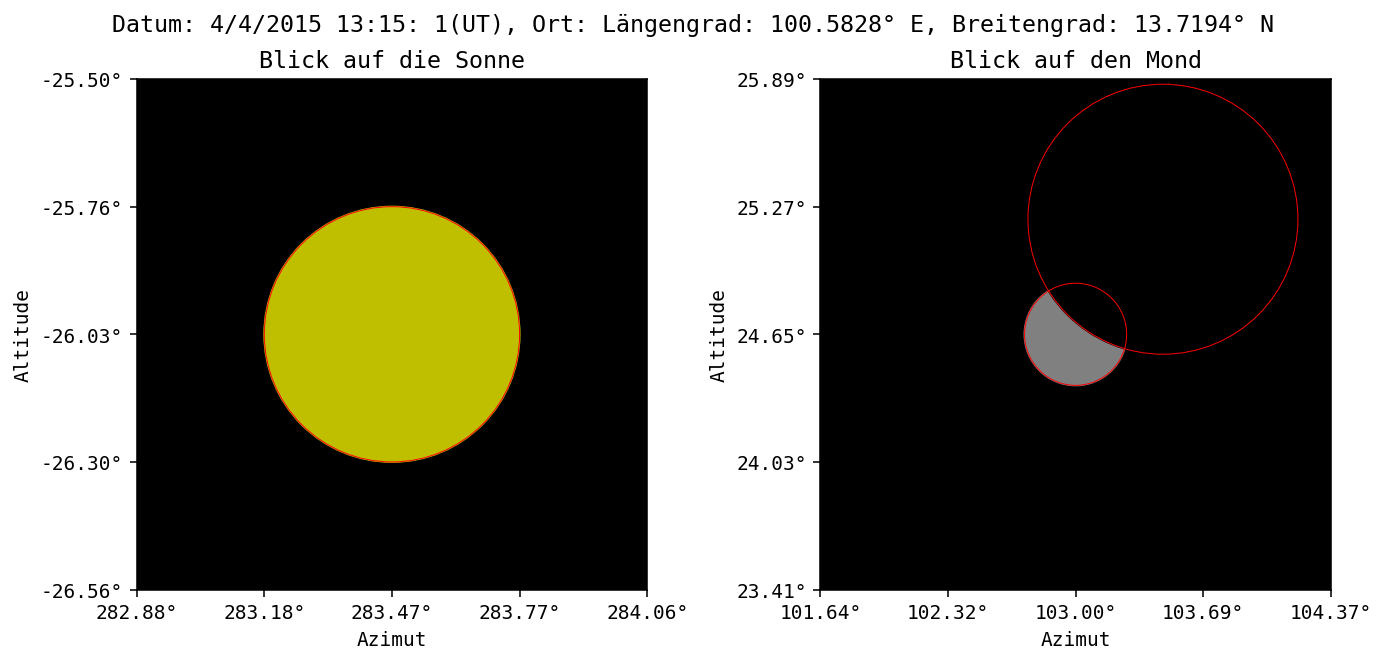

In [2]:
Y,M,D,H = 2015,4,4,13+15/60+1/(60*60)
lat,lon = 13.719444, 100.582778

#Y,M,D,H = 1999,8,11,11+20/60+30/(60*60)
#lat, lon = 45.08,24.288333

#Y,M,D,H = 2011,12,10,12+40/60+30/(60*60)
#lat, lon = 48.137154, 11.576124

#Y,M,D,H = 2025,6,1,15+40/60+30/(60*60)
#lat, lon = 48.137154, 11.576124

azsun,altsun,azopsun,altopsun,azmoon,altmoon,ads,adsop,adm = calc(Y,M,D,H,lat,lon)

%matplotlib inline

#Projektion: Plattkarte mit einer Korrektur der x Komponente
xcorr = np.cos(altopsun)

fig,ax = plt.subplots(ncols=2,figsize=(10,5),dpi=140)
cs = plt.Circle((azsun*xcorr,altsun),ads,color='y')
csr = plt.Circle((azsun*xcorr,altsun),ads,color='r',fill=False,lw=0.5)
cm = plt.Circle((azmoon*xcorr,altmoon),adm,color='black')
cmr = plt.Circle((azmoon*xcorr,altmoon),adm,color='r',fill=False,lw=0.5)
ax[0].add_artist(cs)
ax[0].add_artist(cm)
ax[0].add_artist(csr)
ax[0].add_artist(cmr)
ax[0].set_facecolor((0,0,0))
ax[0].set_xlim([azsun*xcorr-2*ads,azsun*xcorr+2*ads])
ax[0].set_ylim([altsun-2*ads,altsun+2*ads])
ax[0].set_aspect(1)
ax[0].set_title(f'Blick auf die Sonne')
xtick = np.linspace(azsun*xcorr-2*ads,azsun*xcorr+2*ads,5)
ax[0].set_xticks(xtick)
ax[0].set_xticklabels([f'{ele/xcorr*180/np.pi:.2f}°' for ele in xtick])
ytick = np.linspace(altsun-2*ads,altsun+2*ads,5)
ax[0].set_yticks(ytick)
ax[0].set_yticklabels([f'{ele*180/np.pi:.2f}°' for ele in ytick])
ax[0].set_xlabel('Azimut')
ax[0].set_ylabel('Altitude')


cop = plt.Circle((azopsun*xcorr,altopsun),adsop,color='black')
cm = plt.Circle((azmoon*xcorr,altmoon),adm,color='grey')
cmr = plt.Circle((azmoon*xcorr,altmoon),adm,color='r',fill=False,lw=0.5)
copr = plt.Circle((azopsun*xcorr,altopsun),adsop,color='r',fill=False,lw=0.5)
ax[1].add_artist(cm)
ax[1].add_artist(cop)
ax[1].add_artist(cmr)
ax[1].add_artist(copr)
ax[1].set_facecolor((0,0,0))
ax[1].set_xlim([azmoon*xcorr-5*adm,azmoon*xcorr+5*adm])
ax[1].set_ylim([altmoon-5*adm,altmoon+5*adm])
ax[1].set_aspect(1)
ax[1].set_title(f'Blick auf den Mond')
xtick = np.linspace(azmoon*xcorr-5*adm,azmoon*xcorr+5*adm,5)
ax[1].set_xticks(xtick)
ax[1].set_xticklabels([f'{ele/xcorr*180/np.pi:.2f}°' for ele in xtick])
ytick = np.linspace(altmoon-5*adm,altmoon+5*adm,5)
ax[1].set_yticks(ytick)
ax[1].set_yticklabels([f'{ele*180/np.pi:.2f}°' for ele in ytick])
ax[1].set_xlabel('Azimut')
ax[1].set_ylabel('Altitude')

fig.suptitle(f'Datum: {D}/{M}/{Y} {int(H):2.0f}:{int((H-int(H))*60):2.0f}:{((H-int(H))*60-int((H-int(H))*60))*60:2.0f}(UT), Ort: Längengrad: {lon:.4f}° E, Breitengrad: {lat:.4f}° N')

plt.tight_layout()
plt.show()
#plt.savefig('plt1.png')

# Animation

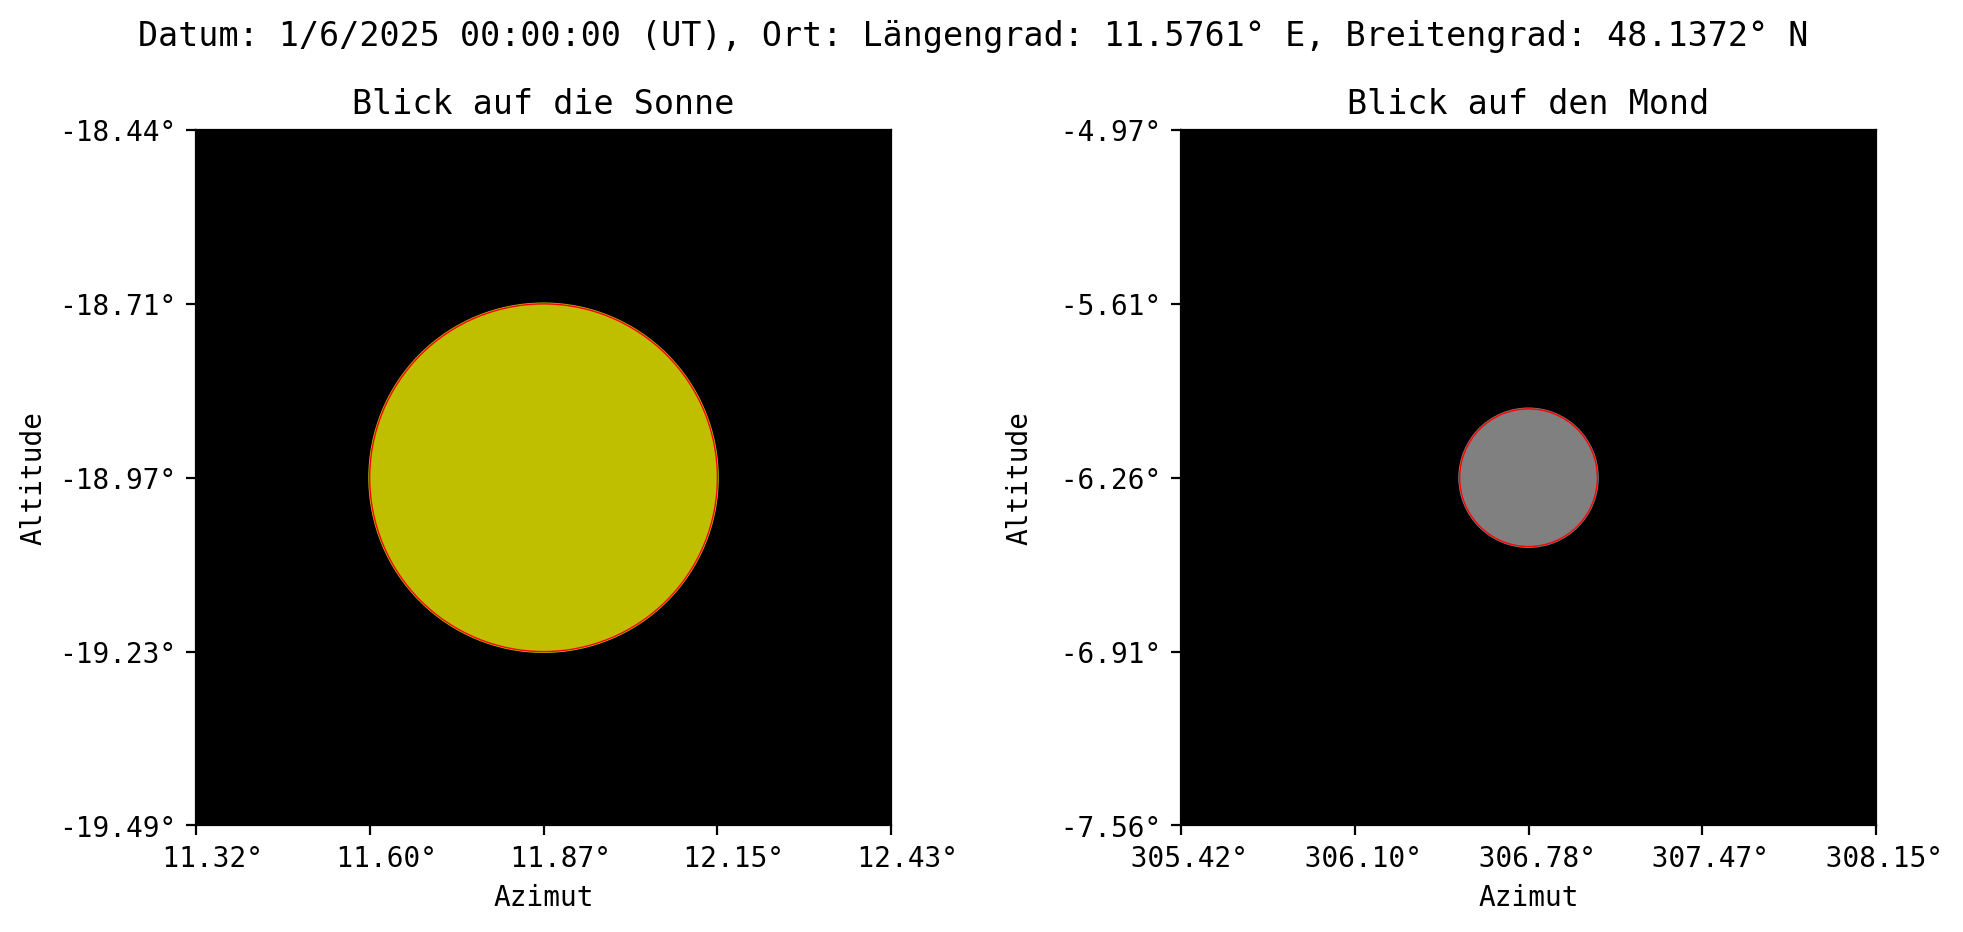

In [4]:
#Y,M,D,H = 2015,4,4,11+15/60+1/(60*60)
#lat,lon = 13.719444, 100.582778

#Y,M,D,H = 1999,8,11,11+20/60+30/(60*60)
#lat, lon = 45.08,24.288333

#Y,M,D,H = 2011,12,10,0
#lat, lon = 48.137154, 11.576124

Y,M,D,H = 2025,6,1,15+40/60+30/(60*60)
lat, lon = 48.137154, 11.576124

azsun,altsun,azopsun,altopsun,azmoon,altmoon,ads,adsop,adm = calc(Y,M,D,H,lat,lon)

#Projektion: Plattkarte mit einer Korrektur der x Komponente
xcorr = np.cos(altopsun)
fig,ax = plt.subplots(ncols=2,figsize=(10,5),dpi=200)
cs = plt.Circle((azsun*xcorr,altsun),ads,color='y')
csr = plt.Circle((azsun*xcorr,altsun),ads,color='r',fill=False,lw=0.5)
cm = plt.Circle((azmoon*xcorr,altmoon),adm,color='black')
cmr = plt.Circle((azmoon*xcorr,altmoon),adm,color='r',fill=False,lw=0.5)
ax[0].add_artist(cs)
ax[0].add_artist(cm)
ax[0].add_artist(csr)
ax[0].add_artist(cmr)
ax[0].set_facecolor((0,0,0))
ax[0].set_xlim([azsun*xcorr-2*ads,azsun*xcorr+2*ads])
ax[0].set_ylim([altsun-2*ads,altsun+2*ads])
ax[0].set_aspect(1)
ax[0].set_title(f'Blick auf die Sonne')
xtick = np.linspace(azsun*xcorr-2*ads,azsun*xcorr+2*ads,5)
ax[0].set_xticks(xtick)
ax[0].set_xticklabels([f'{ele/xcorr*180/np.pi:7.2f}°' for ele in xtick])
ytick = np.linspace(altsun-2*ads,altsun+2*ads,5)
ax[0].set_yticks(ytick)
ax[0].set_yticklabels([f'{ele*180/np.pi:7.2f}°' for ele in ytick])
ax[0].set_xlabel('Azimut')
ax[0].set_ylabel('Altitude')


cop = plt.Circle((azopsun*xcorr,altopsun),adsop,color='black')
cm1 = plt.Circle((azmoon*xcorr,altmoon),adm,color='grey')
cmr1 = plt.Circle((azmoon*xcorr,altmoon),adm,color='r',fill=False,lw=0.5)
copr = plt.Circle((azopsun*xcorr,altopsun),adsop,color='r',fill=False,lw=0.5)
ax[1].add_artist(cm1)
ax[1].add_artist(cop)
ax[1].add_artist(cmr1)
ax[1].add_artist(copr)
ax[1].set_facecolor((0,0,0))
ax[1].set_xlim([azmoon*xcorr-5*adm,azmoon*xcorr+5*adm])
ax[1].set_ylim([altmoon-5*adm,altmoon+5*adm])
ax[1].set_aspect(1)
ax[1].set_title(f'Blick auf den Mond')
xtick = np.linspace(azmoon*xcorr-5*adm,azmoon*xcorr+5*adm,5)
ax[1].set_xticks(xtick)
ax[1].set_xticklabels([f'{ele/xcorr*180/np.pi:7.2f}°' for ele in xtick])
ytick = np.linspace(altmoon-5*adm,altmoon+5*adm,5)
ax[1].set_yticks(ytick)
ax[1].set_yticklabels([f'{ele*180/np.pi:7.2f}°' for ele in ytick])
ax[1].set_xlabel('Azimut')
ax[1].set_ylabel('Altitude')

fig.suptitle(f'Datum: {D}/{M}/{Y} {int(H):.0f}:{int((H-int(H))*60):.0f}:{((H-int(H))*60-int((H-int(H))*60))*60:.0f}, Ort: Längengrad: {lon*180/np.pi:.4f}° E, Breitengrad: {lat*180/np.pi:.4f}° N')
plt.tight_layout()


def animfunc(h):
    H = h
    azsun,altsun,azopsun,altopsun,azmoon,altmoon,ads,adsop,adm = calc(Y,M,D,H,lat,lon)
    xcorr = np.cos(altopsun)
    cs.set_center((azsun*xcorr,altsun))
    csr.set_center((azsun*xcorr,altsun))
    cm.set_center((azmoon*xcorr,altmoon))
    cmr.set_center((azmoon*xcorr,altmoon))
    
    cop.set_center((azopsun*xcorr,altopsun))
    cm1.set_center((azmoon*xcorr,altmoon))
    cmr1.set_center((azmoon*xcorr,altmoon))
    copr.set_center((azopsun*xcorr,altopsun))
    
    ax[0].set_xlim([azsun*xcorr-2*ads,azsun*xcorr+2*ads])
    ax[0].set_ylim([altsun-2*ads,altsun+2*ads])
    ax[0].set_aspect(1)
    ax[0].set_title(f'Blick auf die Sonne')
    xtick = np.linspace(azsun*xcorr-2*ads,azsun*xcorr+2*ads,5)
    ax[0].set_xticks(xtick)
    ax[0].set_xticklabels([f'{ele/xcorr*180/np.pi:7.2f}°' for ele in xtick])
    ytick = np.linspace(altsun-2*ads,altsun+2*ads,5)
    ax[0].set_yticks(ytick)
    ax[0].set_yticklabels([f'{ele*180/np.pi:6.2f}°' for ele in ytick])
    
    ax[1].set_xlim([azmoon*xcorr-5*adm,azmoon*xcorr+5*adm])
    ax[1].set_ylim([altmoon-5*adm,altmoon+5*adm])
    ax[1].set_aspect(1)
    ax[1].set_title(f'Blick auf den Mond')
    xtick = np.linspace(azmoon*xcorr-5*adm,azmoon*xcorr+5*adm,5)
    ax[1].set_xticks(xtick)
    ax[1].set_xticklabels([f'{ele/xcorr*180/np.pi:7.2f}°' for ele in xtick])
    ytick = np.linspace(altmoon-5*adm,altmoon+5*adm,5)
    ax[1].set_yticks(ytick)
    ax[1].set_yticklabels([f'{ele*180/np.pi:6.2f}°' for ele in ytick])
    
    fig.suptitle(f'Datum: {D}/{M}/{Y} {int(H):02}:{int((H-int(H))*60):02}:{int(((H-int(H))*60-int((H-int(H))*60))*60):02} (UT), Ort: Längengrad: {lon:.4f}° E, Breitengrad: {lat:.4f}° N')

    

anim = animation.FuncAnimation(fig,animfunc,frames=np.linspace(0,24,1000),interval=100,repeat=True)
anim.save('Mond am 1.6.2025.mp4')